# L1: Exercise: The Convolutional Classifier

In [11]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

In [3]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [5]:
pretrained_base = tf.keras.models.load_model(
    'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive (2)/cv-course-models/inceptionv1'
)

1) Define Pretrained Base

In [6]:
pretrained_base.trainable = False

When doing transfer learning, it's generally not a good idea to retrain the entire base -- at least not without some care. The reason is that the random weights in the head will initially create large gradient updates, which propogate back into the base layers and destroy much of the pretraining. Using techniques known as fine tuning it's possible to further train the base on new data, but this requires some care to do well.

2) Attach Head

In [8]:
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    # Attach a head of dense layers.
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

3) Train

In [9]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [10]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
)

Epoch 1/30
80/80 [==============================] - 15s 76ms/step - loss: 0.6936 - binary_accuracy: 0.5706 - val_loss: 0.6890 - val_binary_accuracy: 0.5791
Epoch 2/30
80/80 [==============================] - 4s 51ms/step - loss: 0.6672 - binary_accuracy: 0.6232 - val_loss: 0.5768 - val_binary_accuracy: 0.8091
Epoch 3/30
80/80 [==============================] - 4s 50ms/step - loss: 0.5536 - binary_accuracy: 0.8104 - val_loss: 0.5390 - val_binary_accuracy: 0.8220
Epoch 4/30
80/80 [==============================] - 4s 50ms/step - loss: 0.5186 - binary_accuracy: 0.8296 - val_loss: 0.5104 - val_binary_accuracy: 0.8337
Epoch 5/30
80/80 [==============================] - 4s 51ms/step - loss: 0.4951 - binary_accuracy: 0.8435 - val_loss: 0.4905 - val_binary_accuracy: 0.8414
Epoch 6/30
80/80 [==============================] - 4s 51ms/step - loss: 0.4763 - binary_accuracy: 0.8485 - val_loss: 0.4766 - val_binary_accuracy: 0.8414
Epoch 7/30
80/80 [==============================] - 4s 51ms/step - lo

plot the loss and metric curves for this training run.

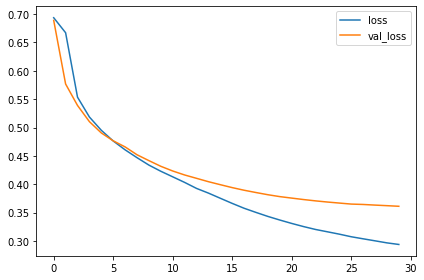

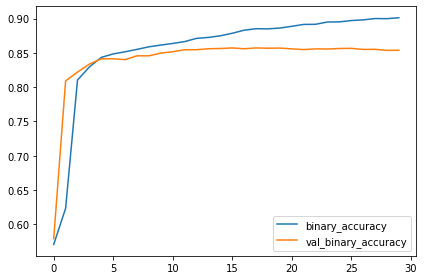

In [12]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();